In [123]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
# Force TensorFlow to use the GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from tensorflow import keras

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Now we need to read in the data
df = pd.read_csv(r'Data\movies.csv')

In [3]:
#Check out the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [120]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profitability
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,8.447027
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,6.381183
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,6.425875
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015,11.136776
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012,6.903707


In [8]:
#Extracting an int from a str in order to use it as a numeric value
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('Int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
#Order by gross and remove all movies without revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df =df[df['gross'] >= 1]

In [10]:
pd.set_option('display.max_rows', 10)

In [121]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profitability
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,8.447027
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,6.381183
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,6.425875
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015,11.136776
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012,6.903707


In [12]:
# Drop any duplicates -- Shouldn't be any in this dataset

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,0,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93.0,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


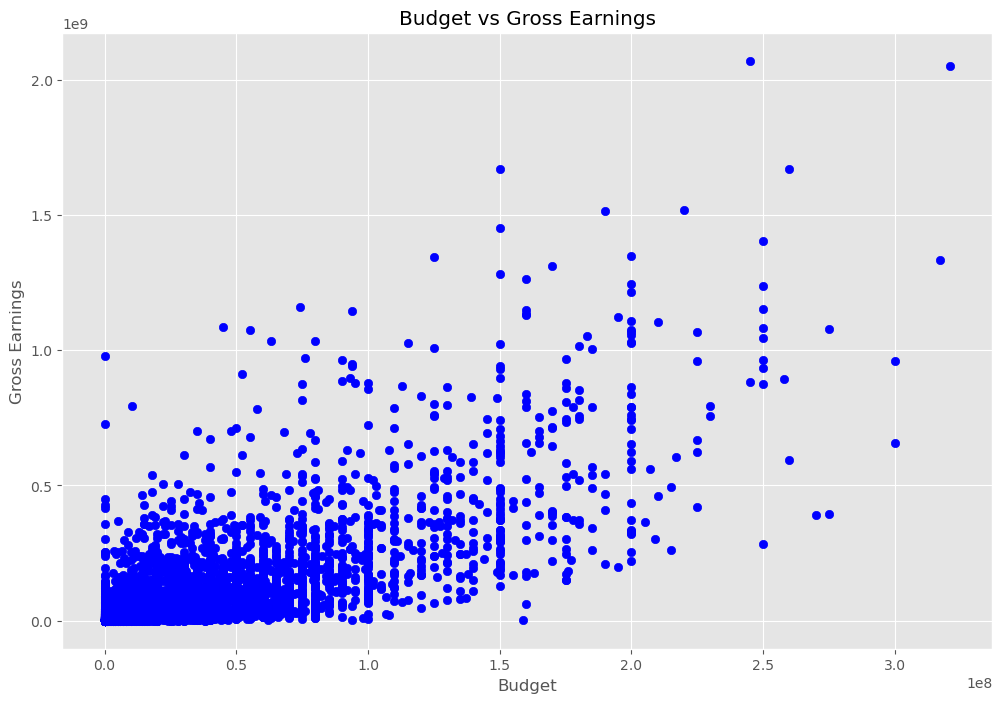

In [13]:
#Scatter plot with budget and gross

plt.scatter(x=df['budget'], y=df['gross'], color='blue')

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

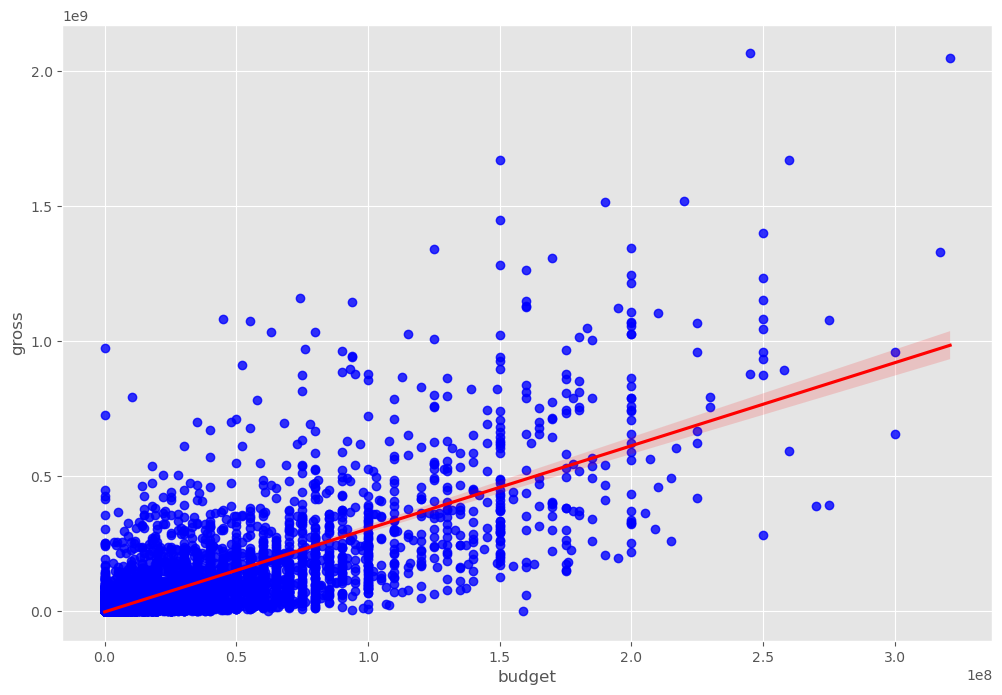

In [15]:
#Regression Plot of budget vs gross

sns.regplot(x='budget', y='gross', data=df, color='blue', line_kws={'color':'red'})

In [17]:
"""
Decided to ask ChatGPT for some help to see how that can be used in Data based fields
Several ML algorithms were suggested by ChatGPT they are as follows
Linear Regression
Random Forest Regression
Gradient Boosting Regression
Support Vector Regression
Artificial Neural Networks
"""

'\nSeveral ML algorithms were suggested by ChatGPT they are as follows\nLinear Regression\nRandom Forest Regression\nGradient Boosting Regression\nSupport Vector Regression\nArtificial Neural Networks\n'

In [18]:
#We'll start with the linear regression as it is the simplest to understand and implement
#Then I'll try another one or two  after that
#Next I'll reframe the question into a classification problem and try other techniques

In [19]:
#Since I am making changes to the dataframe below I am going to create a new variable to store the altered dataframe.
linreg = df.drop(['released'], axis = 1)
linreg = linreg.dropna()
#Got an error making predictions that said there was NaN, infinity, or value too large.
linreg.isnull().values.any()
linreg.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
              ..
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
Length: 15, dtype: int64

In [20]:
# Preprocessing:
# convert categorical variables to numerical using label encoding

le = LabelEncoder()
linreg['genre'] = le.fit_transform(linreg['genre'])
linreg['director'] = le.fit_transform(linreg['director'])
linreg['writer'] = le.fit_transform(linreg['writer'])
linreg['company'] = le.fit_transform(linreg['company'])
linreg['country'] = le.fit_transform(linreg['country'])
linreg['star'] = le.fit_transform(linreg['star'])
linreg['rating'] = le.fit_transform(linreg['rating'])
linreg.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,7.8,876000.0,1077,2448,494,53,245000000,2069521700,1446,138.0,2015
7244,Avengers: Infinity War,5,0,2018,8.4,897000.0,160,708,2107,53,321000000,2048359754,1508,149.0,2018
7480,The Lion King,4,2,2019,6.9,222000.0,1400,1840,633,53,260000000,1670727580,2176,118.0,2019
6653,Jurassic World,5,0,2015,7.0,593000.0,497,3429,412,53,150000000,1670516444,2142,124.0,2015
6043,The Avengers,5,0,2012,8.0,1300000.0,1461,2224,2107,53,220000000,1518815515,1508,143.0,2012


In [21]:
# split the data into training and testing sets
X = linreg.drop(['name', 'gross'], axis=1)
y = linreg['gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)

In [23]:
# make predictions on the test set
y_pred = reg.predict(X_test)

In [24]:
# evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)

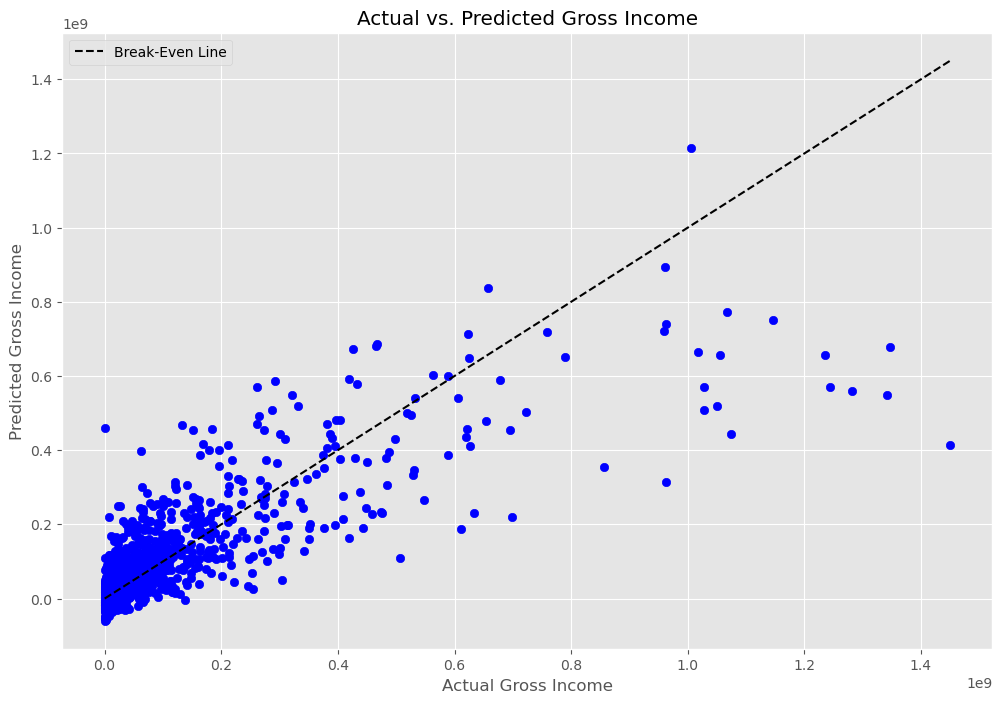

In [25]:
# plot the actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [26]:
#Let's try tuning some hyperparameters to try and improve the models accuracy
#specify the hyperparameters to tune and their possible values
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
# create a linear regression model
reg = LinearRegression()

In [27]:
# create a grid search object with the specified hyperparameters
grid_search = GridSearchCV(reg, param_grid, cv=5)
# fit the grid search to the data
grid_search.fit(X_train, y_train)


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [28]:
# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'fit_intercept': True, 'normalize': False}


In [29]:
# get the best model
best_model = grid_search.best_estimator_
print(best_model)

LinearRegression(normalize=False)


In [30]:
best_reg = LinearRegression(fit_intercept=True, normalize=False)
best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)

C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


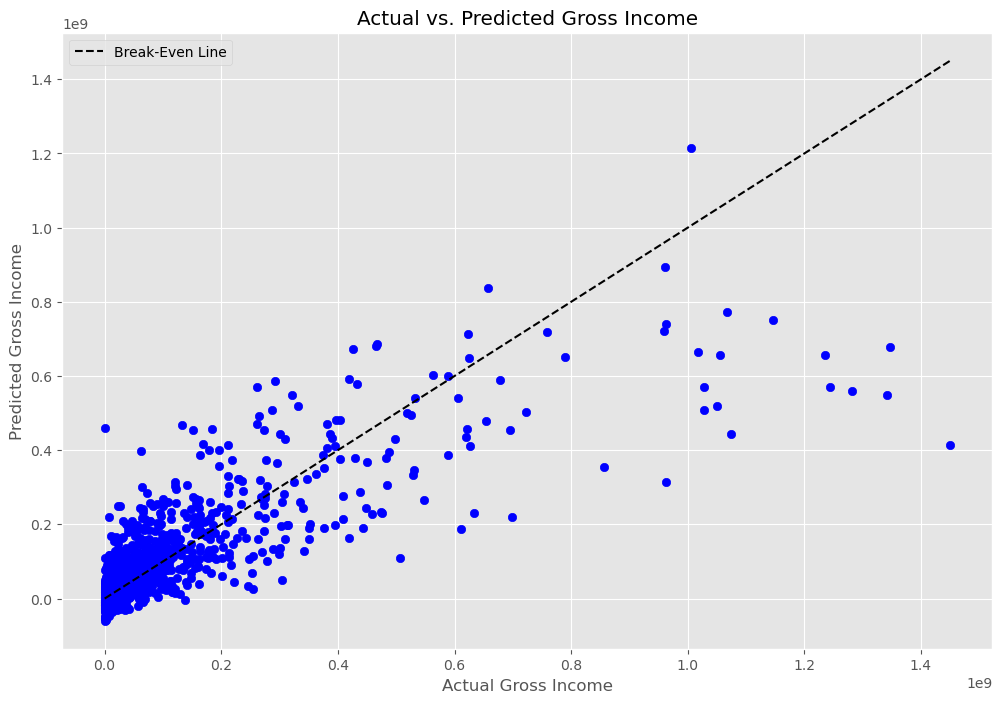

In [31]:
# plot the actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [32]:
#Adding some cross validation doesn't seem to help to change the predictive outcome of the linear regression
#I'm going to move on to another model. I am thinking a Gradient Boosting Regressor
gbrdf = df
gbrdf = gbrdf.drop(columns=['name', 'released'])
gbrdf = gbrdf.dropna()
gbrdf.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,PG,Animation,2019,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,PG-13,Action,2015,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,PG-13,Action,2012,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [33]:
#Checking to make sure all null values have been removed
gbrdf.isnull().sum()

rating         0
genre          0
year           0
score          0
votes          0
              ..
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
Length: 14, dtype: int64

In [34]:
#Encoding the various fields to numeric values in order to use them in a model
le = LabelEncoder()
gbrdf['genre'] = le.fit_transform(gbrdf['genre'])
gbrdf['director'] = le.fit_transform(gbrdf['director'])
gbrdf['writer'] = le.fit_transform(gbrdf['writer'])
gbrdf['company'] = le.fit_transform(gbrdf['company'])
gbrdf['country'] = le.fit_transform(gbrdf['country'])
gbrdf['star'] = le.fit_transform(gbrdf['star'])
gbrdf['rating'] = le.fit_transform(gbrdf['rating'])
gbrdf.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5,0,2015,7.8,876000.0,1077,2448,494,53,245000000,2069521700,1446,138.0,2015
7244,5,0,2018,8.4,897000.0,160,708,2107,53,321000000,2048359754,1508,149.0,2018
7480,4,2,2019,6.9,222000.0,1400,1840,633,53,260000000,1670727580,2176,118.0,2019
6653,5,0,2015,7.0,593000.0,497,3429,412,53,150000000,1670516444,2142,124.0,2015
6043,5,0,2012,8.0,1300000.0,1461,2224,2107,53,220000000,1518815515,1508,143.0,2012


In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(gbrdf.drop(['gross'], axis=1), gbrdf['gross'], test_size=0.2, random_state=0)

In [36]:
# Initialize the model
gbr = GradientBoostingRegressor()

In [37]:
# Fit the model on the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
# Make predictions on the test data
y_pred = gbr.predict(X_test)

In [39]:
# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 36884398.600328095


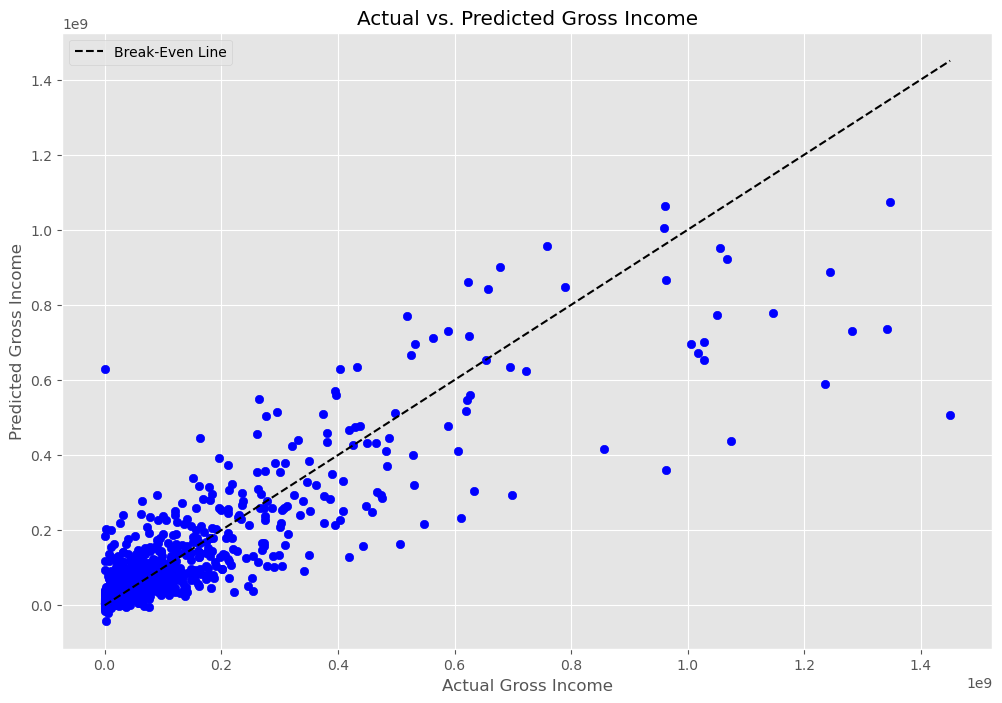

In [40]:
#Let's plot the output even though the mae is still really high
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [41]:
#Let's see if a Neural Network would have a better time with predicting gross income.
#I don't think there will be an improvement, but no harm in doing it anyway.

In [42]:
#Let's use tensorflow and keras for the model instead of sklearn
nnrdf = df
nnrdf = nnrdf.dropna()

In [43]:
# preprocessing the data
le = LabelEncoder()
nnrdf['genre'] = le.fit_transform(nnrdf['genre'])
nnrdf['director'] = le.fit_transform(nnrdf['director'])
nnrdf['writer'] = le.fit_transform(nnrdf['writer'])
nnrdf['company'] = le.fit_transform(nnrdf['company'])
nnrdf['country'] = le.fit_transform(nnrdf['country'])
nnrdf['star'] = le.fit_transform(nnrdf['star'])
nnrdf['rating'] = le.fit_transform(nnrdf['rating'])

x_data = nnrdf.drop(['name','gross', 'released'], axis=1).values
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)
y_data = nnrdf['gross'].values


In [44]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=101)

In [45]:
# building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(x_data.shape[1],)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

In [46]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# training the model
model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0) #1000 epochs was used

In [48]:
# evaluating the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE: ", mse)
print("MAE: ", mae)

70/70 [==============================] - 0s 681us/step
MSE:  8851137184123262.0
MAE:  49385195.73107147


In [49]:
#As predicted even at 1000 epochs a Neural Network didn't outperform a Gradient Boost Regression
#Since there isn't an evident way to predict Gross income perhaps we can reframe the question and ask
#if we can predict whether or not a movie will be profitable?

In [50]:
#Lets' start by adding a field to a dataframe which will show the profitability of a film
df['profitability'] = df['gross'] / df['budget']
prodf = df
prodf = prodf.sort_values(by=['profitability'], inplace=False, ascending=False)
prodf = prodf[prodf['budget'] >= 1]
le = LabelEncoder()
prodf['genre'] = le.fit_transform(prodf['genre'])
prodf['director'] = le.fit_transform(prodf['director'])
prodf['writer'] = le.fit_transform(prodf['writer'])
prodf['company'] = le.fit_transform(prodf['company'])
prodf['country'] = le.fit_transform(prodf['country'])
prodf['star'] = le.fit_transform(prodf['star'])
prodf['rating'] = le.fit_transform(prodf['rating'])
prodf.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profitability
5114,Paranormal Activity,6,9,2007,"October 16, 2009 (United States)",6.3,225000.0,1455,2299,979,47,15000,193355800,1287,86.0,2009,12890.386667
3459,The Blair Witch Project,6,9,1999,"July 30, 1999 (United States)",6.5,239000.0,377,610,649,47,60000,248639099,776,81.0,1999,4143.984983
6815,The Gallows,6,9,2015,"July 10, 2015 (United States)",4.3,20000.0,1988,478,1441,47,100000,42964410,1048,81.0,2015,429.644100
2093,El Mariachi,6,0,1992,"February 26, 1993 (United States)",6.9,64000.0,1673,2608,238,30,7000,2040920,454,81.0,1993,291.560000
5154,Once,6,6,2007,"June 15, 2007 (United States)",7.8,112000.0,944,1488,617,22,150000,20936722,319,86.0,2007,139.578147


In [51]:
#NULLS NULLS NULLS NULLS
prodf = prodf.dropna()
prodf.isnull().sum()

name             0
rating           0
genre            0
year             0
released         0
                ..
gross            0
company          0
runtime          0
yearcorrect      0
profitability    0
Length: 17, dtype: int64

In [143]:
#Next let's find which features are most important to predicting a film's profitability

#Remove the redundant fields and values that wouldn't be avialable prior to the releasing of a film.
#We'll also remove the year as a predictor since we want to know if a potential movie pitch would be profitable and
#we can't really go back in time to take advantage of good years.
X = prodf.drop(['profitability','name', 'released', 'year', 'gross', 'votes', 'score', 'yearcorrect'], axis=1)
y = prodf['profitability']

# Create a random forest regressor
rf = RandomForestRegressor()

# Fit the random forest regressor to the data
rf.fit(X, y)

# Create RFE with 3 features to select
rfe = RFE(rf, n_features_to_select=2)

In [144]:
# Fit the RFE model to the data
rfe = rfe.fit(X, y)

In [145]:
# Check the features that were selected
print(X.columns[rfe.support_])
print(X.columns[rfe.ranking_])

Index(['genre', 'budget'], dtype='object')
Index(['profit_class', 'genre', 'star', 'country', 'company', 'budget',
       'genre', 'writer', 'director', 'runtime'],
      dtype='object')


In [114]:
#It appears that the 3 most important features when predicting a movies profitability are Genre, Budget, and Company.
#I have decided to use a K-Nearest Neighbor Classifier to determine if a movies expected profitability score is greater than 1
#This is because I have set profitability to be gross/budget and 1 is break even, Hollywood gotta make that bread yo!

In [124]:
#Gonna need a target variable for this one.
prodf['profit_class'] = (prodf['profitability'] > 1).astype(int)

In [125]:
# Select the features and target
X = prodf[['rating', 'genre', 'director', 'writer', 'star', 'country', 'budget', 'company', 'runtime']]
y = prodf['profit_class']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [129]:
# Evaluate the model on the test data
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.20%


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
#Let's try that again, but this time with just the 3 most important features
# Select the features and target
X = prodf[['genre','budget', 'company']]
y = prodf['profit_class']

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [135]:
# Evaluate the model on the test data
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.11%


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [147]:
#The most important feature is the budget followed by genre. Let's see if removing company gives us something better.
X = prodf[['genre','budget']]
y = prodf['profit_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 61.73%


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [148]:
#Just budget
X = prodf[['budget']]
y = prodf['profit_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.93%


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#The conclusion that I have come to is that creating movies and having them be profitable is almost the 
#exact same odds as flipping a coin. 